In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# We will use an example dataset that comes with scikit learn
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)
print(california.data.shape)
print(california.target.shape)

(20640, 8)
(20640,)


In [24]:
np.array(california.data).shape

(20640, 8)

In [25]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [26]:
df = california.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [28]:
X = california.data
y = california.target

In [29]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [30]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1337)

In [32]:
y_train.shape, y_val.shape, y_test.shape

((13209,), (3303,), (4128,))

In [33]:
FEATURES = ['MedInc', 'Latitude', 'Longitude']
X_train = X_train[FEATURES]
X_val = X_val[FEATURES]
X_test = X_test[FEATURES]


In [34]:
!pip install seaborn


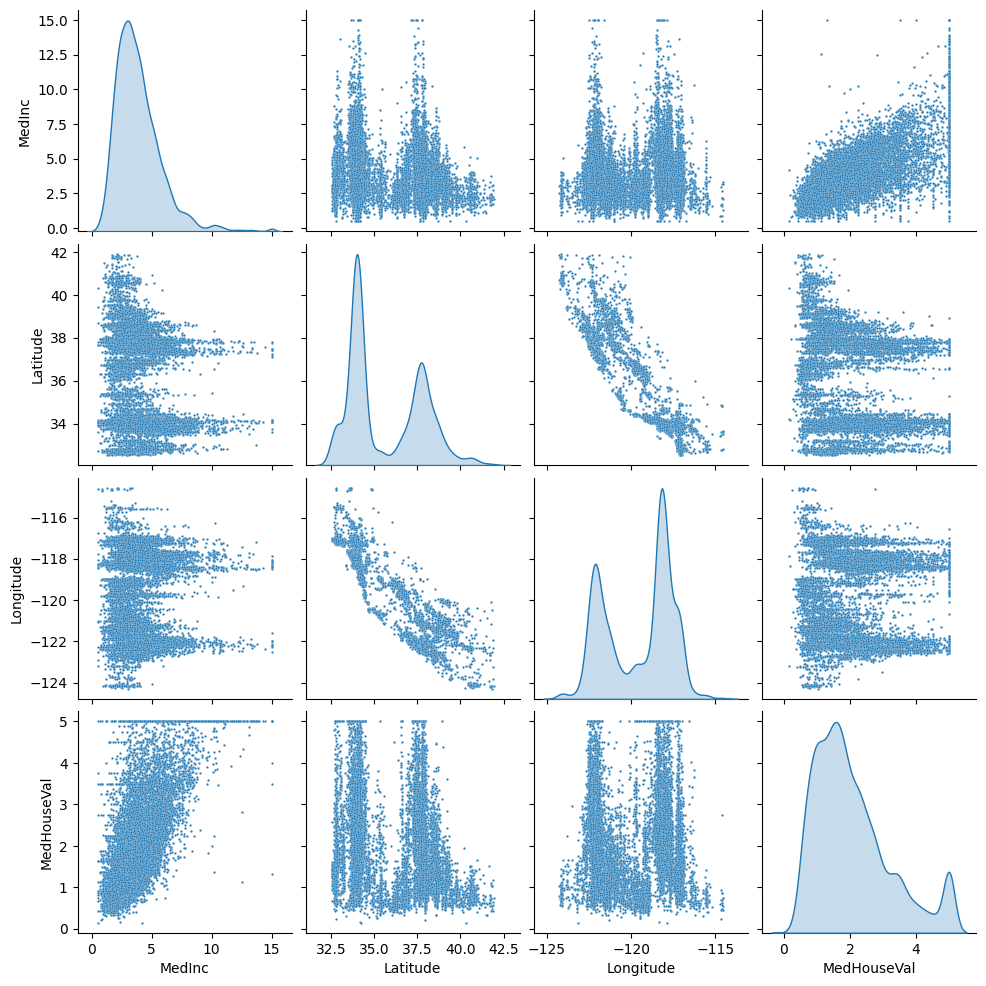

In [35]:
import seaborn as sns

train_dataset = X_train.copy()[FEATURES]
train_dataset['MedHouseVal'] = y_train
sns.pairplot(train_dataset, kind="scatter", diag_kind="kde", plot_kws={'s': 3})

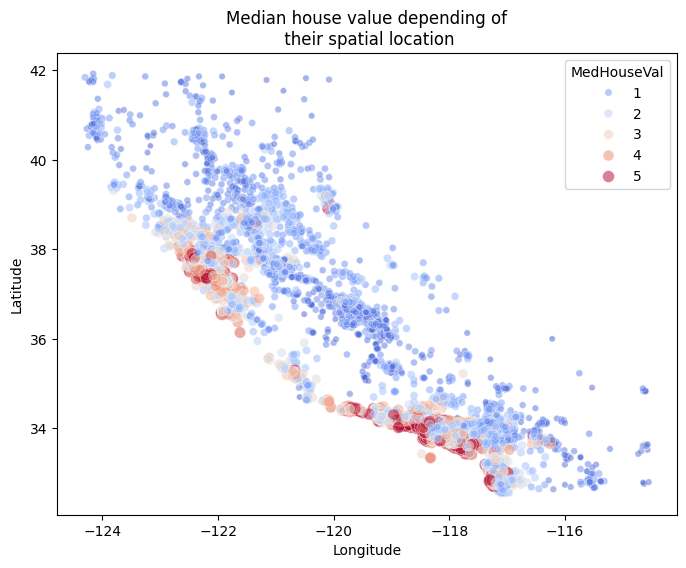

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=train_dataset,
    x='Longitude',
    y='Latitude',
    hue='MedHouseVal',
    size='MedHouseVal',
    palette='coolwarm',
    alpha=0.5,
)

plt.legend(title='MedHouseVal', loc='best')
plt.title('Median house value depending of\n their spatial location')
plt.show()

In [37]:
X_train, X_val, X_test = X_train[FEATURES], X_val[FEATURES], X_test[FEATURES]
X_train['Constant'] = 1
X_val['Constant'] = 1
X_test['Constant'] = 1

X_train

,MedInc,Latitude,Longitude,Constant
20397,5.0855,34.22,-118.86,1
12505,2.8542,38.56,-121.44,1
17969,3.6990,37.32,-121.97,1
10302,7.0217,33.89,-117.80,1
13609,4.1000,34.14,-117.27,1
...,...,...,...,...
18217,5.9291,37.40,-122.08,1
19663,1.4529,37.49,-120.84,1
14107,2.4219,32.75,-117.11,1
6234,4.6312,34.06,-117.95,1


In [38]:
def mean_squared_error(y_true, y_pred):
    squared_error = (y_pred - y_true)**2
    return np.mean(squared_error)

def loss(theta, X, y_true):
    y_pred = X @ theta
    return mean_squared_error(y_true, y_pred)

In [39]:
from numpy.linalg import pinv 

def compute_theta_star_and_losses(X_train: np.ndarray, y_train: np.ndarray, 
                                  X_val: np.ndarray, y_val: np.ndarray):
    theta_star = pinv(X_train) @ y_train
    print(f'{theta_star=}')
    print("[Train] RMSE", np.sqrt(loss(theta_star, X_train, y_train)))
    print("[Validation] RMSE", np.sqrt(loss(theta_star, X_val, y_val)))

    return theta_star

In [40]:
from numpy.linalg import pinv 

def compute_theta_star_and_losses(X_train: np.ndarray, y_train: np.ndarray, 
                                  X_val: np.ndarray, y_val: np.ndarray):
    theta_star = pinv(X_train) @ y_train
    print(f'{theta_star=}')
    print("[Train] RMSE", np.sqrt(loss(theta_star, X_train, y_train)))
    print("[Validation] RMSE", np.sqrt(loss(theta_star, X_val, y_val)))

    return theta_star

In [41]:
theta_star_0 = compute_theta_star_and_losses(X_train[['MedInc', 'Constant']].to_numpy(), y_train.to_numpy(), 
                                             X_val[['MedInc', 'Constant']].to_numpy(), y_val.to_numpy())


theta_star=array([0.41541694, 0.46307929])
[Train] RMSE 0.8409740226452519
[Validation] RMSE 0.8350645095371897


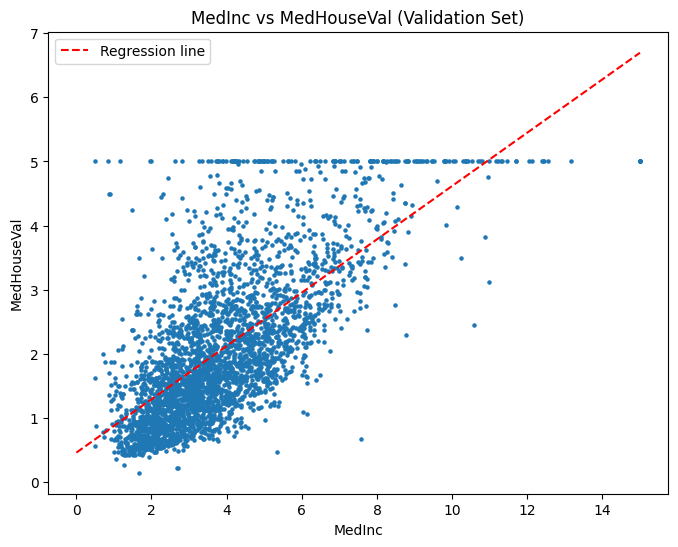

In [42]:
medinc = X_val['MedInc'].to_numpy()
x_0, x_max = np.array([0, 1]), np.array([np.max(medinc), 1])
y_0 = x_0.T @ theta_star_0
y_max = x_max.T @ theta_star_0 

plt.figure(figsize=(8, 6))
plt.scatter(medinc, y_val.to_numpy(), s=5)
plt.plot([0, np.max(medinc)], [y_0, y_max], c='r', linestyle='--', label='Regression line')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

plt.title('MedInc vs MedHouseVal (Validation Set)')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import r2_score

def plot_true_vs_pred(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    m = np.max([np.max(y_true), np.max(y_pred)])

    plt.figure(figsize=(8, 8))
    plt.plot([0, m], [0, m], c='r')
    plt.scatter(y_pred, y_true, s=5)
    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    plt.title(f'Predictions vs True Targets\nR^2 = {np.round(r2, 3)}, RMSE = {np.round(rmse, 3)}')
    plt.show()

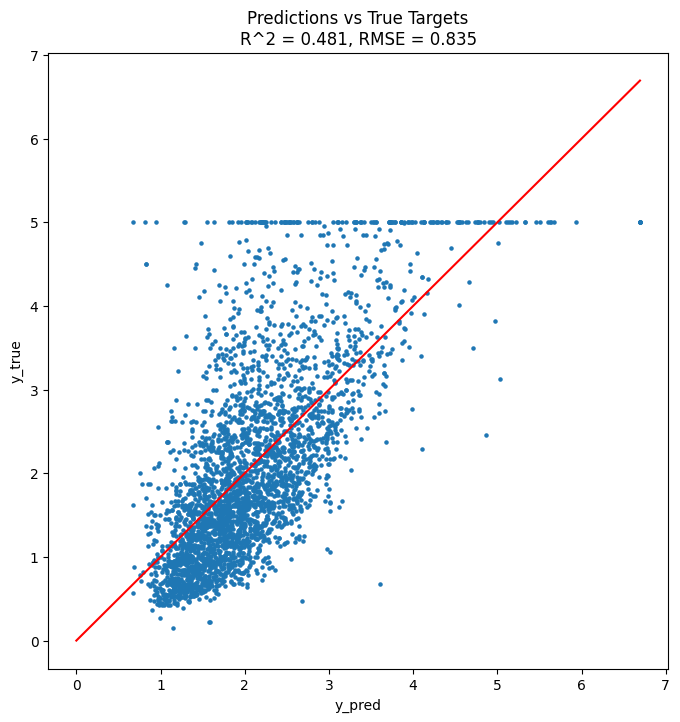

In [45]:
y_pred_val = X_val[['MedInc', 'Constant']] @ theta_star_0
plot_true_vs_pred(y_true=y_val, y_pred=y_pred_val)

In [47]:
theta_star_1 = compute_theta_star_and_losses(X_train.to_numpy(), y_train.to_numpy(), 
                                             X_val.to_numpy(), y_val.to_numpy())

theta_star=array([  0.36371705,  -0.48707938,  -0.5011276 , -41.9015768 ])
[Train] RMSE 0.7469723090851088
[Validation] RMSE 0.7458199506297581


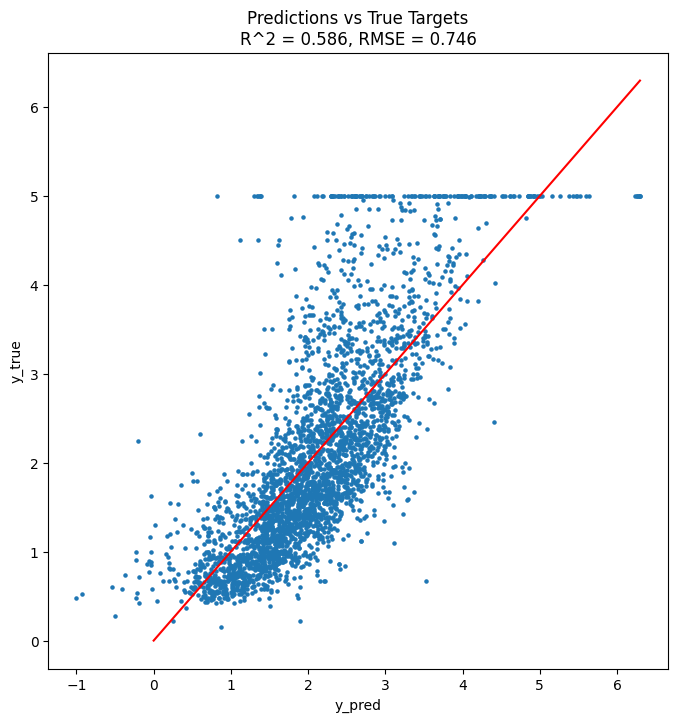

In [48]:
y_pred_val = X_val @ theta_star_1
plot_true_vs_pred(y_true=y_val, y_pred=y_pred_val)

In [49]:
# Show summary info
print("X_train info:")
print(X_train.info())
print("-" * 50)

# Show first few rows of X_train and y_train
print("X_train (first 5 rows):")
display(X_train.head())   # if you're in Jupyter Notebook
print("-" * 50)

print("y_train (first 5 values):")
display(y_train.head())
print("=" * 80)

# Show first few rows of X_val and y_val
print("X_val (first 5 rows):")
display(X_val.head())
print("-" * 50)

print("y_val (first 5 values):")
display(y_val.head())
print("=" * 80)


X_train info:
<class 'pandas.core.frame.DataFrame'>
Index: 13209 entries, 20397 to 7010
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     13209 non-null  float64
 1   Latitude   13209 non-null  float64
 2   Longitude  13209 non-null  float64
 3   Constant   13209 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 516.0 KB
None
--------------------------------------------------
X_train (first 5 rows):


,MedInc,Latitude,Longitude,Constant
20397,5.0855,34.22,-118.86,1
12505,2.8542,38.56,-121.44,1
17969,3.6990,37.32,-121.97,1
10302,7.0217,33.89,-117.80,1
13609,4.1000,34.14,-117.27,1


--------------------------------------------------
y_train (first 5 values):


20397    2.322
12505    1.394
17969    2.375
10302    3.579
13609    0.964
Name: MedHouseVal, dtype: float64

X_val (first 5 rows):


,MedInc,Latitude,Longitude,Constant
2928,1.2469,35.37,-119.01,1
4705,3.5481,34.06,-118.34,1
11967,2.0742,34.00,-117.40,1
1419,6.1359,37.97,-122.05,1
8557,4.7319,33.93,-118.40,1


--------------------------------------------------
y_val (first 5 values):


2928     0.467
4705     3.960
11967    0.762
1419     2.500
8557     3.761
Name: MedHouseVal, dtype: float64

In [ ]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians as rad

EARTH_RADIUS = 6_378_000 # earth radius in meters
san_francisco_coords = (rad(37.7749), rad(-122.4194)) # thanks OpenStreetMap!
los_angeles_coords = (rad(34.0549), rad(-118.2426))# thanks OpenStreetMap!

def distance_to_city(coords, city):
    assert city in ['los_angeles', 'san_francisco']
    city_coords = los_angeles_coords if city == 'los_angeles' else san_francisco_coords

    dists = []
    for i in range(coords.shape[0]):
        coords_row = (rad(coords[i, 0]), rad(coords[i, 1]))
        dist = haversine_distances([coords_row, city_coords])
        dist = (dist[0, 1] * EARTH_RADIUS) / 1000 # distance in km
        dists.append(dist)
    
    return np.array(dists)

# non-linear feature transform
def add_min_city_distances_feature(X: pd.DataFrame):
    coords = X[['Latitude', 'Longitude']].to_numpy()
    dist_to_la = distance_to_city(coords, city='los_angeles')
    dist_to_sf = distance_to_city(coords, city='san_francisco')
    min_dists = np.vstack([dist_to_la, dist_to_sf]).min(axis=0)
    X = X.copy() # create a copy such that we don't modify the input DataFrame
    X['MinCityDistances'] =  min_dists

    return X

In [52]:
X_train_augmented = add_min_city_distances_feature(X_train)
X_val_augmented = add_min_city_distances_feature(X_val)
X_test_augmented = add_min_city_distances_feature(X_test)

X_train_augmented

,MedInc,Latitude,Longitude,Constant,MinCityDistances
20397,5.0855,34.22,-118.86,1,59.780110
12505,2.8542,38.56,-121.44,1,122.411807
17969,3.6990,37.32,-121.97,1,64.322224
10302,7.0217,33.89,-117.80,1,44.792929
13609,4.1000,34.14,-117.27,1,90.153048
...,...,...,...,...,...
18217,5.9291,37.40,-122.08,1,51.360808
19663,1.4529,37.49,-120.84,1,142.799207
14107,2.4219,32.75,-117.11,1,179.378726
6234,4.6312,34.06,-117.95,1,26.990586


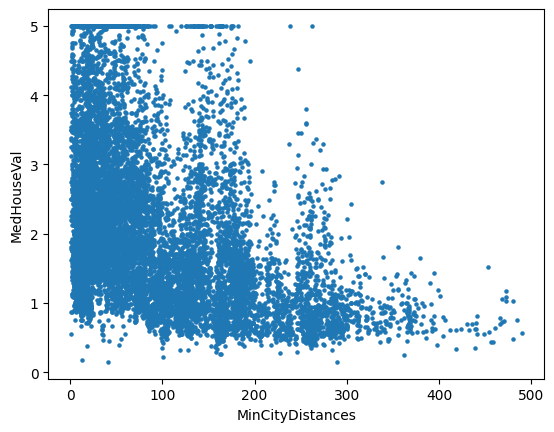

In [53]:
plt.scatter(X_train_augmented['MinCityDistances'], y_train, s=5)
plt.xlabel('MinCityDistances')
plt.ylabel('MedHouseVal')
plt.show()

In [54]:
theta_star_2 = compute_theta_star_and_losses(X_train_augmented, y_train, X_val_augmented, y_val)

theta_star=array([ 3.54865116e-01, -3.67580769e-01, -3.89556016e-01, -3.25963100e+01,
       -2.09537075e-03])
[Train] RMSE 0.7331094755360498
[Validation] RMSE 0.7293903293059165


In [56]:
sigma = 1.

basis_functions = [
    # Polynomial basis functions
    lambda x: x ** 2,
    lambda x: x ** 3,
    lambda x: x ** 4,
    lambda x: x ** 5,

    # Radial Basis Functions
    lambda x: np.exp(-((x - 1) ** 2) / (2 * sigma ** 2)),
    lambda x: np.exp(-((x - 3) ** 2) / (2 * sigma ** 2)),
    lambda x: np.exp(-((x - 5) ** 2) / (2 * sigma ** 2)),
    lambda x: np.exp(-((x - 7) ** 2) / (2 * sigma ** 2)),
    lambda x: np.exp(-((x - 9) ** 2) / (2 * sigma ** 2)),
]

In [57]:
def add_basis_function_features(X: np.ndarray):
    X_nonlin_features = []
    for basis_fn in basis_functions:
        X_nonlin_features.append(basis_fn(X))
    
    X_nonlin_features = np.hstack(X_nonlin_features)
    return np.hstack([X, X_nonlin_features])

In [58]:
X_train_augmented_basis = add_basis_function_features(X_train_augmented.to_numpy())
X_val_augmented_basis = add_basis_function_features(X_val_augmented.to_numpy())
X_test_augmented_basis = add_basis_function_features(X_test_augmented.to_numpy())

In [59]:
X_train_augmented_basis.shape

(13209, 50)

In [60]:
theta_star_3 = compute_theta_star_and_losses(X_train_augmented_basis, y_train, X_val_augmented_basis, y_val)

theta_star=array([-1.02874567e+000,  5.32613242e-001, -2.24964895e-002,
        7.08293860e-004, -2.03617250e-002,  4.45787847e-001,
        9.44655318e+000,  3.38042705e-001,  7.10842634e-004,
        2.32029815e-004, -5.71198106e-002, -5.22900759e-001,
        1.59766272e-002,  7.10842603e-004, -1.26321966e-006,
        3.10891657e-003,  1.08019028e-002,  1.65960338e-004,
        7.10842603e-004,  3.11052269e-009, -6.26592867e-005,
       -7.90723488e-005,  5.18449441e-007,  7.10842603e-004,
       -2.66113960e-012, -6.56097732e-001, -9.24543701e-017,
        1.33329247e-018,  7.10842603e-004,  5.70114838e-001,
       -3.03215103e-001, -2.50660347e-189,  0.00000000e+000,
        9.62020850e-005,  6.42888402e-001, -7.05615123e-001,
       -1.68824303e-164,  0.00000000e+000,  2.38461127e-007,
       -2.02559266e-001, -4.89976955e-001, -2.09605128e-141,
        0.00000000e+000,  1.08261184e-011, -1.43968776e-003,
       -7.30937431e-002, -4.80258102e-120,  0.00000000e+000,
        9.002

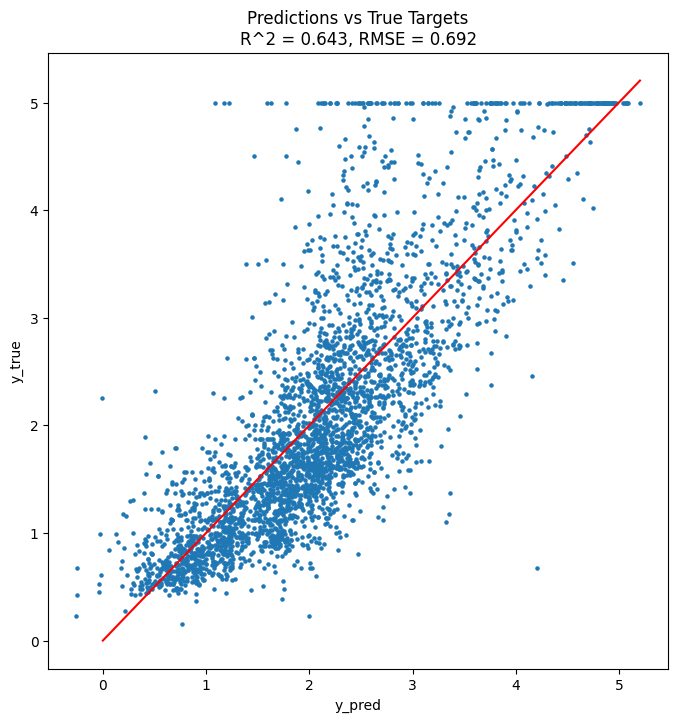

In [61]:
y_pred_val_3 = X_val_augmented_basis @ theta_star_3
plot_true_vs_pred(y_true=y_val, y_pred=y_pred_val_3)